#PlayStore Data Analysis

# **Problem Satement**


1. What factors influence app ratings the most ?
2. Are there any patterns in user review sentiment based on app category or content ratings?
3. Which content ratings tend to have higher or lower user ratings?
4. What is Average number of users reviews per app category ?
5. Are there any seasonal trends in app install or ratings ?
6. Do user tend to rate free apps differently form paid apps ?
7. Which category of apps is the most competetive in terms of the number of available apps ?
8. Are there any categories that consistently receive higher user ratings ?
9. What are the top categories on Play Store?
10. Average rating of the apps
11. Top apps that are of free type.
12. Top apps that are of paid type.
13. Android version based on each category ?
14. Percentage of Seniment
15. Apps with the highest number of negative reviews.
16. Histogram of Subjectivity
17. Paid App Content Rating
18. Does Last Update date has an effects on rating?
19. Distribution of App update over the Year
20. Distribution of Paid and Free app updated over the Month


#Import All Libraries

In [6]:
import numpy as np #this is use to perform mathematical operation on Data 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns # these two library are using for Visulization of data

In [3]:
import pandas as pd  # this library is used to manipulate dataset and to clean the data also 

**Now Let us import our Dataset and begin the Analysis** <br>
**Here We have to Dataset 1. Play Store Data.csv And 2. User Reviews.csv**


In [4]:
df1 = pd.read_csv("Play Store Data.csv") #reading csv file 

In [7]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
#*Getting the number of rows and columns in the given Data set
rows = df1.shape[0]
col = df1.shape[1]
print("The number of rows is",rows,"The Number coluns is",col)
print("The Columns are")
df1.columns

The number of rows is 10841 The Number coluns is 13
The Columns are


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [194]:
df1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


**Let's Find How many NULL values present in our data**


In [195]:
df1.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**Here We can see that we have 1474 Null values in Ratigs Columns and 1 in Type Content Rating and 8 values in Current Version And there are only 3 null vlues in Andriod Versin**
<br> So We need to handle these null values<br>
To do this first we need to handle small number of null values


In [196]:
df1[df1['Content Rating'].isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [197]:
df1[df1['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


So we will drop these values because it will not affect our Analysis


In [198]:
df1.dropna(subset=['Type','Content Rating'],inplace=True)

In [199]:
df1.shape

(10839, 13)

 handle the nan values android vesion column


In [200]:
df1[df1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Now we can see we just have only 2 Nan values in this table this values is going to dropped because it does not contribute too much in our data set


In [201]:
df1.dropna(subset=['Android Ver'],inplace=True)

In [202]:
df1.shape

(10837, 13)

Here we succefully removed the rows that contain Nan values


In [203]:
df1['Current Ver'].dropna(inplace=True)


In [204]:
df1[df1['Current Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


Now we handle the Ratings column Nan values We cannot drop those values because these values are big in size and contribute too much


We know that the rating of any app in the play store will be in between 1 and 5.


In [205]:
df1[(df1['Rating'] <1) | (df1['Rating']>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


There Is no Rating values that is greater and smaller than the given range.


Here we can raplce these Nan values by Median and Mean of the rating Column.


In [206]:
Mean = df1['Rating'].mean() 
Median = df1['Rating'].median()
print(f'The mean is {round(Mean,4)} and the Median is {Median}')

The mean is 4.1917 and the Median is 4.3


### **Visulization of Distribution of Ratings Columns**


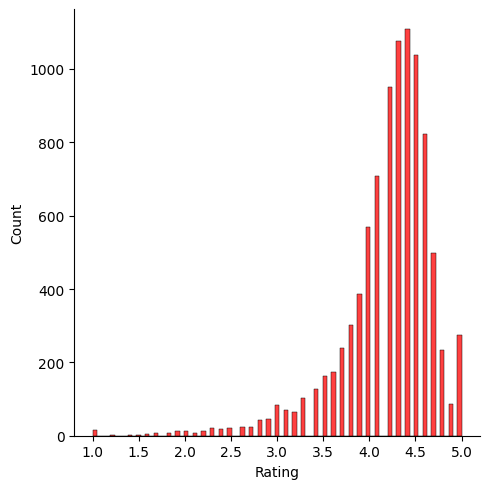

In [207]:
sns.displot(df1['Rating'],color='red')


- By this Representation we can see the data of ratings column is Skewed(Right Skewed).
  <br>
- As we know that if the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.<br>
- Hence we will impute the NaN values in the Rating column with its median.


In [208]:
df1.fillna(value=Median,inplace=True)

In [209]:
df1['Rating'].isna().sum()

0

In [210]:
df1.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## We successfully handle our all Nan values


# **Handling Duplicate Values Of The Data Set**


To do this we just need to handle duplicate values of Apps Columns


In [211]:
df1['App'].value_counts()

App
ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
8 Ball Pool                                           7
Candy Crush Saga                                      7
                                                     ..
U-Craft Mobile                                        1
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: count, Length: 9656, dtype: int64

Here there are many which occurs more than one in our data set <br>
So we will drop this rows which contain duplicate values


In [304]:
df1.drop_duplicates(subset=['App'],inplace=True)

In [305]:
df1.shape

(9656, 13)

Here We sccessfully removed Duplicate values from the data set


## **Now we need to change the Data type of some column to analyze them perfectly**


- Chaging the data type of the last update Column


In [214]:
df1["Last Updated"] = pd.to_datetime(df1['Last Updated'])
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


- Changing Data type Of Price Column.


In [215]:
df1['Price'].value_counts()


Price
0          8901
$0.99       145
$2.99       124
$1.99        73
$4.99        70
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: count, Length: 92, dtype: int64

To do this we will remove '$' Symbol from the each value. For which we will write a user define function named as remove_sym ()


In [216]:
def remove_sym(data):
    if '$' in data:
        return float(data[1:])
    else :
        return float(data)

In [217]:
df1.loc[10472,'Price']='0.0'

In [218]:
#Applying functon 
df1['Price'] = df1['Price'].apply(lambda x : remove_sym(x))

In [219]:
df1['Price'].dtype 

dtype('float64')

- Changing The data type of Reviews column


In [220]:
df1.loc[10472,'Reviews'] = "3000000"

In [221]:
df1['Reviews'] = df1['Reviews'].astype(int)

In [222]:
df1['Reviews'].dtype

dtype('int32')

- Changing the Data type of Installs Column


In [223]:
df1.drop(10472,inplace=True)

This values are consists of , and + we need remove these wo symbol:
To do this we will write a user define function


In [224]:
# Creating a function convert_installs which drops the '+' symbol if it is present and returns the output which is of integer datatype.

def convertinstalls(val):
  if '+' and ',' in val:
    new = (val[:-1].replace(',',''))
    return new
  elif '+' in val:
    new1 = (val[:-1])
    return new1
  else:
    return (val)

In [225]:
df1['Installs'] = df1['Installs'].apply(lambda x : convertinstalls(x))
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


- Changing Data type of size column


In [226]:
df1['Size'].value_counts()

Size
Varies with device    1226
11M                    181
12M                    181
14M                    177
13M                    177
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: count, Length: 461, dtype: int64

In [227]:
# Defining a function to convert all the entries in KB to MB and then converting them to float datatype.

def convert_kb_to_mb(val):
  
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4)
    else:
      return val
  except:
    return val

In [228]:
# The kb_to_mb funtion applied to the size column

df1['Size'] = df1['Size'].apply(lambda x: convert_kb_to_mb(x))
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [229]:
df1[df1['Size']== 'Varies with device'].value_counts().sum()

1226

In Total We have 1226 rows which have 'Varies with device' in size coumn we cannot drop that rows because it is big in size and it can be affect oy anlysis
we will raplace this with Mean or median of the column


In [230]:
mean_size = round(df1[df1['Size'] != 'Varies with device']['Size'].mean(),4)

median_size = df1[df1['Size'] != 'Varies with device']['Size'].median()
[mean_size, median_size]

[20.3982, 12.0]

C:\Users\Dell\AppData\Local\Temp\ipykernel_15240\723311898.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[df1['Size'] != 'Varies with device']['Size'], color='purple')


<Axes: xlabel='Size', ylabel='Density'>

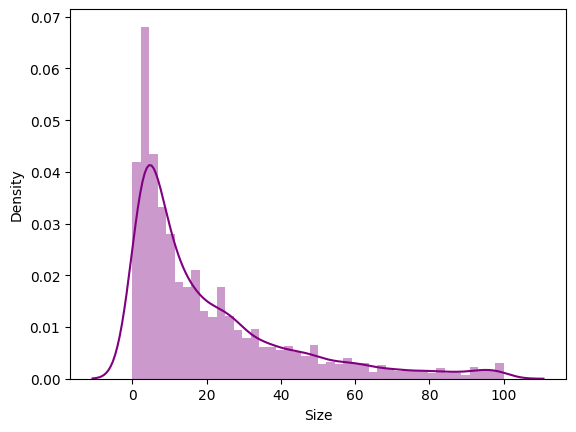

In [231]:
# Distplot
# fig, ax = plt.subplots(2,1, figsize=(12,7))
sns.distplot(df1[df1['Size'] != 'Varies with device']['Size'], color='purple')

Here we can see The data is left skewed. There are vast entries of Varies from devices in size column if we raplace this with mean or median it can give error. so we left this values as it is.


**Finally we coverted all the values in that form which is suitable for data analysis.**
**After that we also an second data set that os User Review Data set. we also need to explore this data set and we also need to clean this data set.**


## **User_review.csv Data Set Exporing And Cleaning**


In [232]:
df2 = pd.read_csv('User Reviews.csv')

In [233]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [234]:
df2.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


**Number of columns and rows in the data set**


In [235]:
col = df2.shape[1]
row = df2.shape[0]
print(f'Number of Rows is {row} and number of columns is {col}')
print("The columns are:")
print(df2.columns)

Number of Rows is 64295 and number of columns is 5
The columns are:
Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


In [236]:
def findigs():
  find=pd.DataFrame(index=df2.columns)
  find["datatype"]=df2.dtypes
  find["not null values"]=df2.count()
  find["null value"]=df2.isnull().sum()
  find["% of the null value"]=df2.isnull().mean().round(4)*100
  find["unique count"]=df2.nunique()
  return find
findigs()

,datatype,not null values,null value,% of the null value,unique count
App,object,64295,0,0.00,1074
Translated_Review,object,37427,26868,41.79,27994
Sentiment,object,37432,26863,41.78,3
Sentiment_Polarity,float64,37432,26863,41.78,5410
Sentiment_Subjectivity,float64,37432,26863,41.78,4474


Here we can see that we have 26868 null values preset in the every column excluding 'App' column which cotribute too much in our data


## **Let's Handle this Nan / NULL Values**


In this dataset the important column is Transalted_review Column We need to see that column first


In [237]:
df2[df2['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


Here we can see that if There is nan value in transalted_review column it also affect on other column like **Sentiment**, **Sentiment_Polarity**, And **Sentiment_Subjectivity**
But we also want to check if any exception here


In [238]:
df2[df2['Translated_Review'].isnull() & ~(df2['Sentiment'].isnull())]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


Here We can see we have total 5 exception. Which is wrong because if this we also have some values in **Sentiment_Polarity** and **Sentiment_Subjectivity** but we dont have those values. Hence we want to drop these values. Because we cannot change these values by any oter values.


In [239]:
df2.shape

(64295, 5)

In [240]:
df2.dropna(inplace=True)


In [241]:
df2.shape

(37427, 5)

Here we drop all nan values.


In [242]:
df2.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

Now we dont have any Nan values in the data set


**Here in we handeled all the nan values of our two data sets and we succesfully developed an data pipeline.**<br>
**Now we can examine our data by making some usefull graphs and charts etc by which we can simplify out data**


First we will see if there is realtion between variable here we will use heatmap


## **(I)Correlation Plot**


In [243]:
corrdf1 = pd.concat([df1['Installs'],df1['Price'],df1['Rating'],df1['Reviews'],df1['Size']],axis=1)

Here we make an seperate Dataframe For correlation In which we will do some modification. That modification is will change **Varies with device** with Nan Values(In SIZE Column). By doing we can fine Correlation because we can do corr operation only with numeric values.


In [244]:
corrdf1['Size']=corrdf1['Size'].replace('Varies with device',np.NaN)


In [245]:
corrdf1.corr()

,Installs,Price,Rating,Reviews,Size
Installs,1.000000,-0.009407,0.034327,0.625163,0.134276
Price,-0.009407,1.000000,-0.018658,-0.007599,-0.022448
Rating,0.034327,-0.018658,1.000000,0.050224,0.045627
Reviews,0.625163,-0.007599,0.050224,1.000000,0.179311
Size,0.134276,-0.022448,0.045627,0.179311,1.000000


Text(0.5, 1.0, 'Corelation Heatmap for Playstore Data')

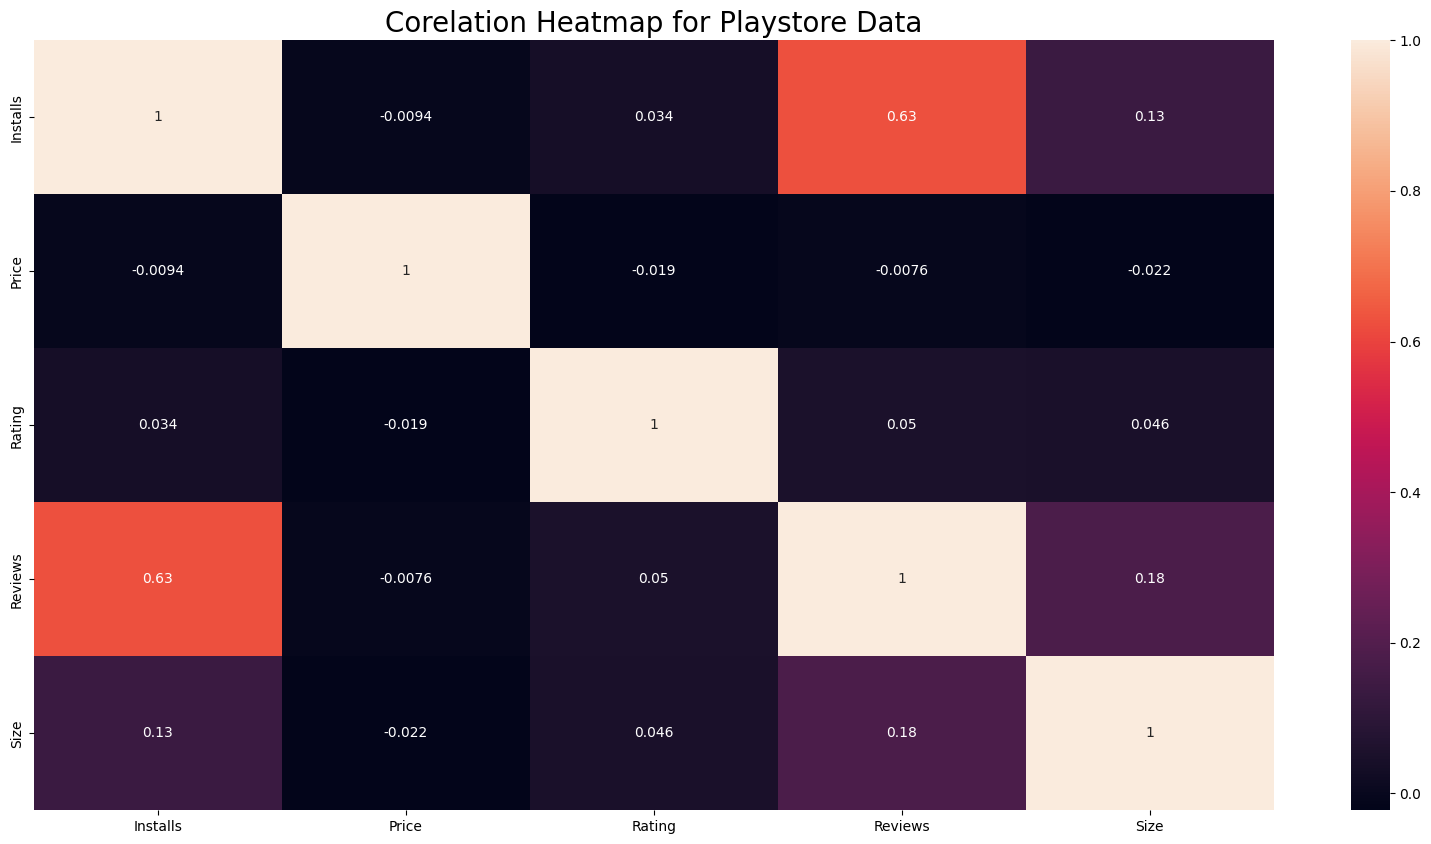

In [246]:
# Heat map for play_store
plt.figure(figsize = (20,10))
sns.heatmap(corrdf1.corr(), annot= True)
plt.title('Corelation Heatmap for Playstore Data', size=20)

## **Findings from this Heatmap**

- There is negative correlation between Install and Price column. By which we can state that most of user likes free apps.
- There is Positive correlation between Reviews and Installs Column that means If number of user of apps increases the reviewes also increases.


**Let's Check if any correlation between two data set**


In [279]:
merged_df = pd.merge(df1, df2, on='App', how = "inner")
merged_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35924,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device,Overall great app. Best gallery seen far,Positive,0.475000,0.512500
35925,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device,"Recommended, 100% love it, keep good work dev ...",Positive,0.566667,0.733333
35926,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device,Too much ads,Positive,0.200000,0.200000
35927,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device,Just allow time ...,Neutral,0.000000,0.000000


In [248]:
merged_df2 = pd.concat([merged_df['Rating'],merged_df['Reviews'],merged_df['Size'],merged_df['Installs'],merged_df['Price'],merged_df['Sentiment_Polarity'],merged_df['Sentiment_Subjectivity']],axis=1)

In [249]:
merged_df2['Size'] = merged_df2['Size'].replace('Varies with device',np.NaN)

In [250]:
merged_df2.corr()

,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.075736,0.167534,0.020145,-0.010055,0.092903,0.068758
Reviews,0.075736,1.000000,0.430137,0.564256,-0.020591,-0.080021,-0.009315
Size,0.167534,0.430137,1.000000,0.213743,-0.019786,-0.159388,0.009185
Installs,0.020145,0.564256,0.213743,1.000000,-0.025213,-0.057842,-0.006307
Price,-0.010055,-0.020591,-0.019786,-0.025213,1.000000,0.024148,0.003182
Sentiment_Polarity,0.092903,-0.080021,-0.159388,-0.057842,0.024148,1.000000,0.259668
Sentiment_Subjectivity,0.068758,-0.009315,0.009185,-0.006307,0.003182,0.259668,1.000000


Text(0.5, 1.0, 'Corelation Heatmap for Both Data sets')

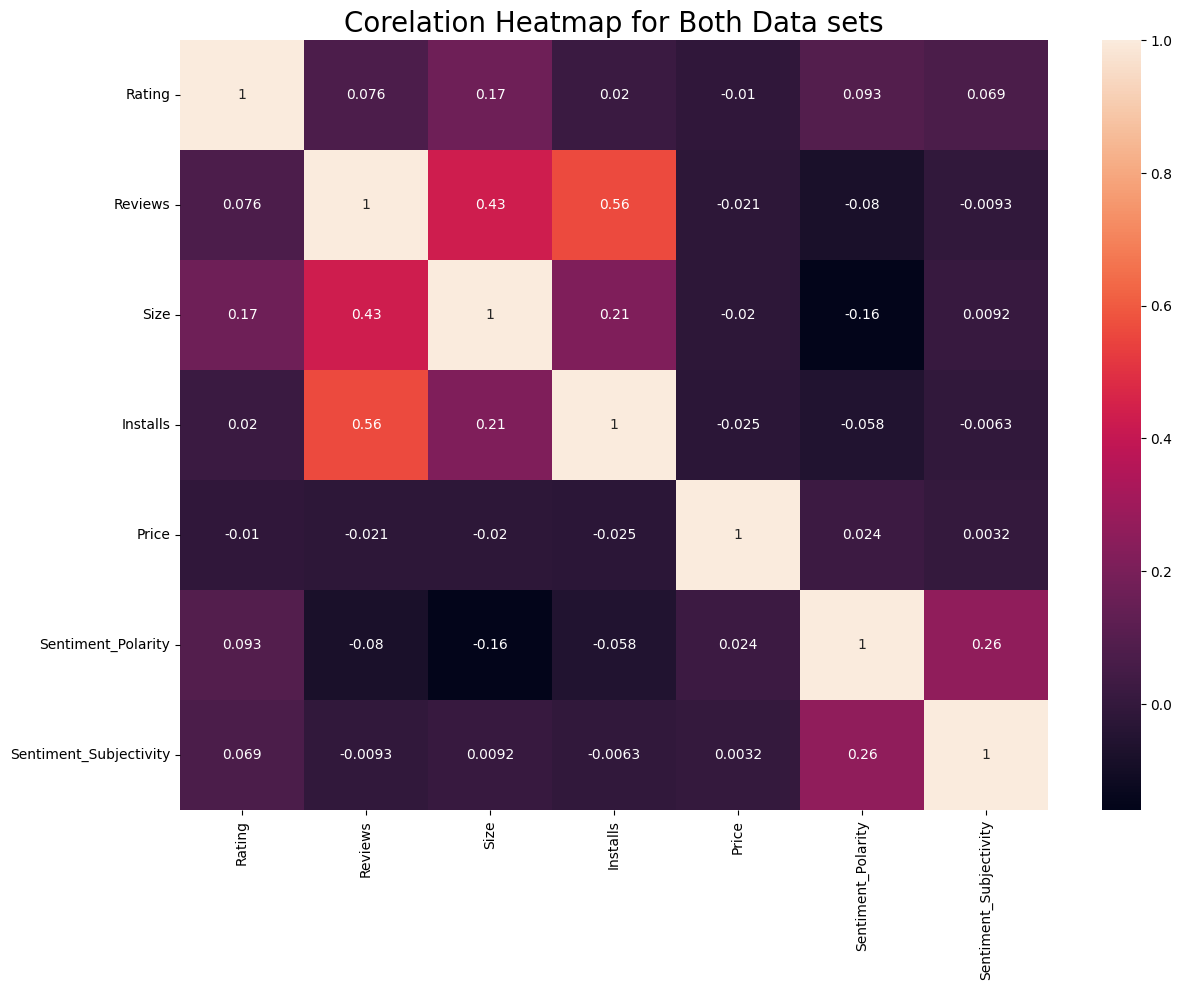

In [251]:
# Heat map for both Dataset 
plt.figure(figsize = (14,10))
sns.heatmap(merged_df2.corr(), annot= True)
plt.title('Corelation Heatmap for Both Data sets', size=20)

**1. What factors influence app ratings the most ?**<br>
By the corrleation heat map we can see that Size, Installs, Price are the facotors which influece the ratings.Because here is positive correlaion in Installs Size and ratings, and there nagative correlation in ratings and Price that means user rate most of aaps that are freely available.


**2. Are there any patterns in user review sentiment based on app category or content ratings?** <br>


In [252]:
category_sentiment = merged_df.groupby('Category')['Sentiment'].value_counts().unstack()
category_sentiment

Sentiment,Negative,Neutral,Positive
Category,,,
ART_AND_DESIGN,61,62,259
AUTO_AND_VEHICLES,17,36,236
BEAUTY,65,88,185
BOOKS_AND_REFERENCE,95,108,448
BUSINESS,169,258,655
COMICS,1,5,39
COMMUNICATION,207,176,641
DATING,361,286,1068
EDUCATION,102,90,655


<Axes: xlabel='Category'>

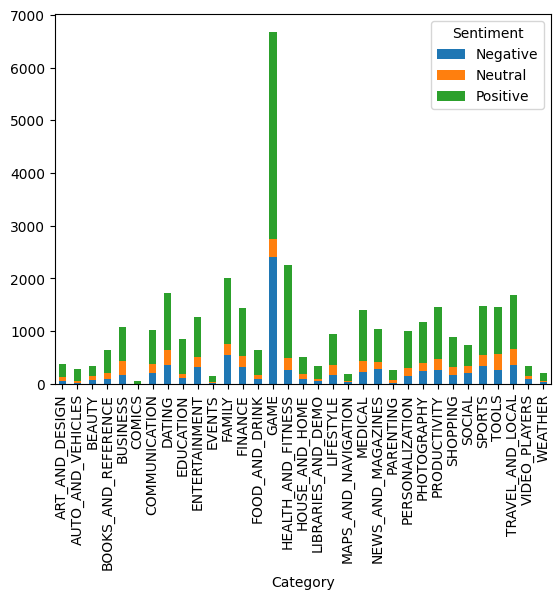

In [253]:
category_sentiment.plot(kind='bar',stacked=True)

Here we can clearly see that Games Category have highest number of positive Sentimenent follwed by Health And Fitness , Family etc.
Now we can see Ratings also


In [254]:
category_ratings = merged_df.groupby('Rating')['Sentiment'].value_counts().unstack()
category_ratings

Sentiment,Negative,Neutral,Positive
Rating,,,
2.6,12,11,8
2.7,28,18,19
3.0,27,13,23
3.1,20,27,73
3.2,13,16,10
3.3,12,9,43
3.4,87,40,113
3.5,83,72,168
3.6,70,51,92


<Axes: xlabel='Rating'>

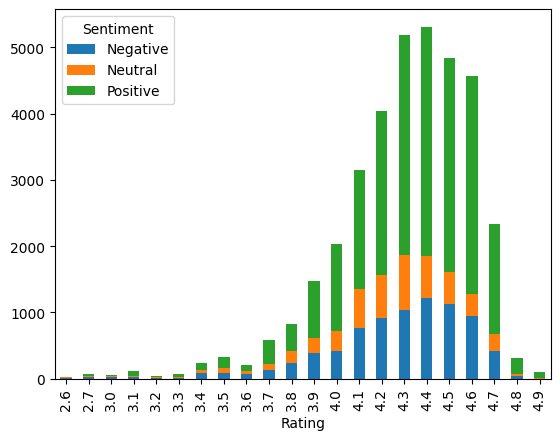

In [255]:
category_ratings.plot(kind='bar',stacked=True)

Here we can clearly se that if app have higher ratings user sentiments are positive. By that we can say that Ratings are Directly proportional to Sentiment of User


**3. Which content ratings tend to have higher or lower user ratings?**<br>


In [256]:
Q3 = merged_df.groupby('Content Rating')['Rating'].mean()
Q3

Content Rating
Adults only 18+    4.500000
Everyone           4.303645
Everyone 10+       4.332894
Mature 17+         4.129275
Teen               4.335450
Name: Rating, dtype: float64

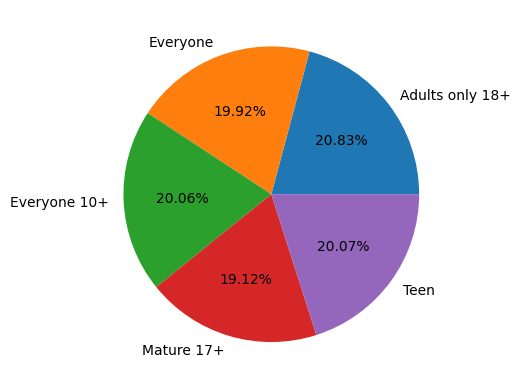

In [257]:

plt.pie(Q3, labels=Q3.index,autopct='%1.2f%%')
plt.show()


- User of age 10+ and 18+ and teen Gives more ratings while Mature user slighltly likes to give ratings.


**4. What is Average number of users reviews per app category ?**<br>


In [258]:
Q4 = merged_df.groupby('Category')['Reviews'].mean()
Q4

Category
ART_AND_DESIGN         2.881050e+04
AUTO_AND_VEHICLES      5.262294e+04
BEAUTY                 1.550871e+04
BOOKS_AND_REFERENCE    5.626125e+05
BUSINESS               9.758153e+04
COMICS                 2.076544e+04
COMMUNICATION          1.641031e+06
DATING                 2.372814e+04
EDUCATION              1.816154e+06
ENTERTAINMENT          2.817468e+05
EVENTS                 3.403715e+03
FAMILY                 5.878097e+05
FINANCE                1.161915e+05
FOOD_AND_DRINK         1.567454e+05
GAME                   3.776168e+06
HEALTH_AND_FITNESS     2.613552e+05
HOUSE_AND_HOME         1.673726e+04
LIBRARIES_AND_DEMO     2.940355e+04
LIFESTYLE              1.968392e+05
MAPS_AND_NAVIGATION    2.866747e+04
MEDICAL                1.495983e+04
NEWS_AND_MAGAZINES     2.214037e+05
PARENTING              8.610535e+03
PERSONALIZATION        5.330805e+05
PHOTOGRAPHY            2.454314e+06
PRODUCTIVITY           9.083638e+05
SHOPPING               7.513125e+05
SOCIAL             

Text(0, 0.5, 'Average Reviwe')

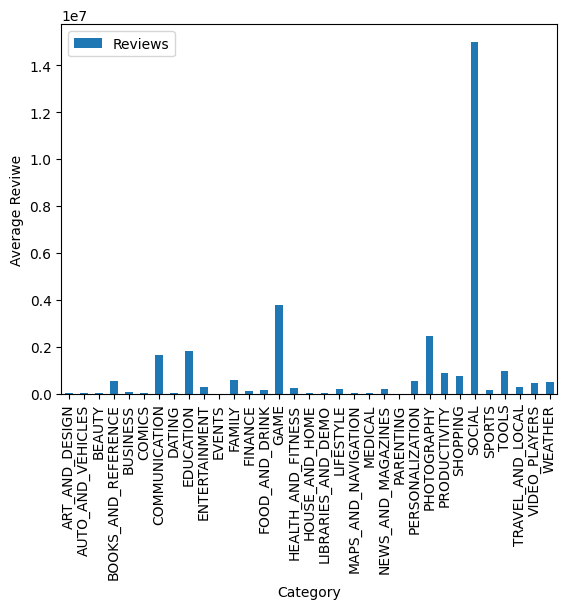

In [259]:
Q4.plot(kind='bar')
plt.legend()
plt.xlabel("Category")
plt.ylabel("Average Reviwe")

Here we can see that social apps have higher number of average reviews and it is obvious. After that Games have higher number of average reviews followed by Photography , Education , Communication etc


**5. Do user tend to rate free apps differently form paid apps ?**


In [260]:
free = merged_df[merged_df['Type']=='Free']
paid = merged_df[merged_df['Type']=='Paid']

In [261]:
free_paid = merged_df.groupby('Type')['Rating'].mean()

Text(0, 0.5, 'Average ratings')

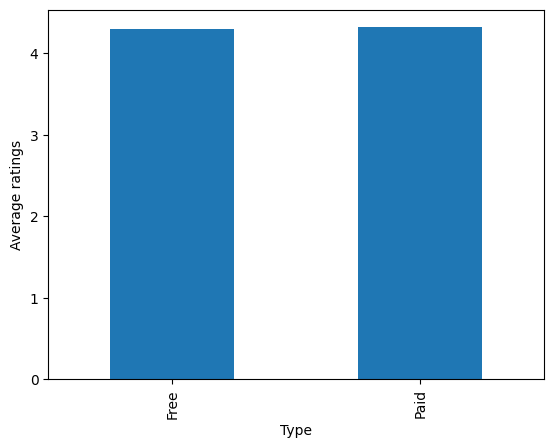

In [262]:
free_paid.plot(kind='bar')
plt.xlabel("Type")
plt.ylabel("Average ratings")


We can see there is very small difference in free and paid apps ratings by which we can say user gives positives reviews when hey quality apps.


**6.Which category of apps is the most competetive in terms of the number of available apps ?**


In [263]:
installs = merged_df.groupby('Category')['Installs'].max()

In [264]:
installs = pd.DataFrame(installs)

In [265]:
installs = installs['Installs'].astype(int)

Text(0, 0.5, 'Category')

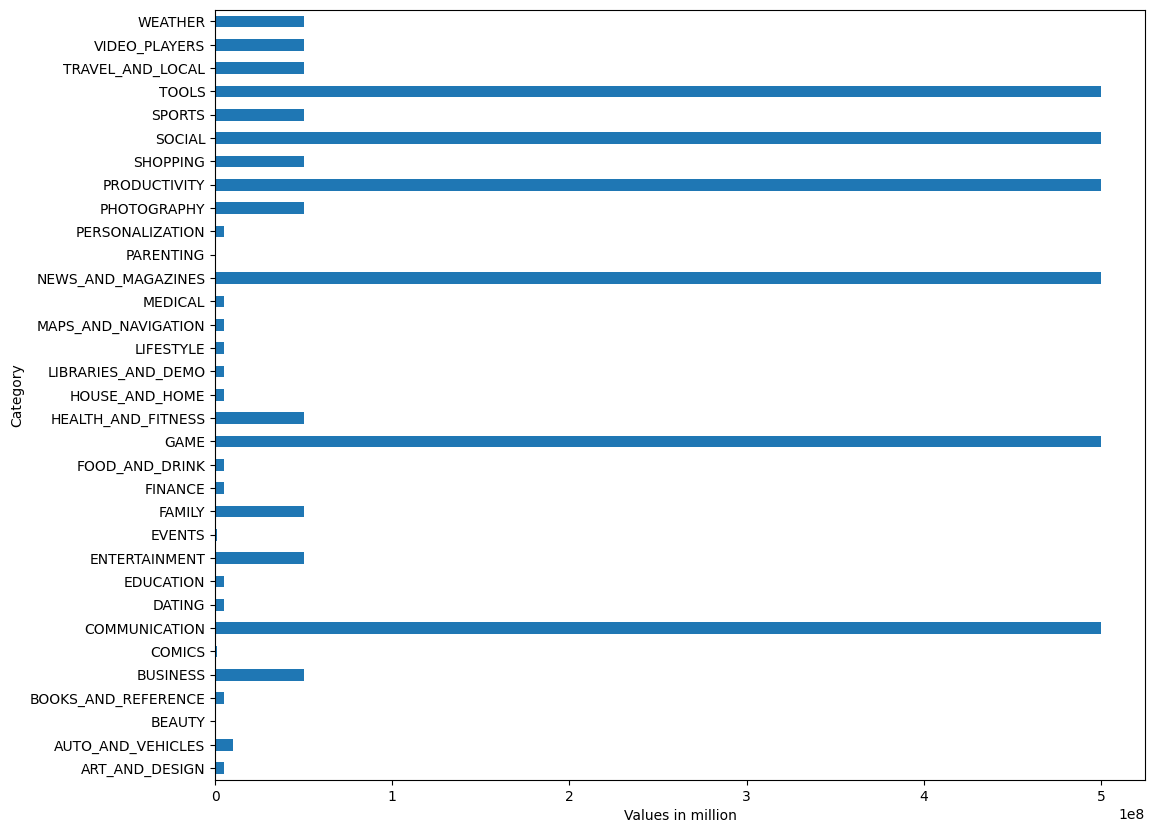

In [266]:
plt.figure(figsize=(12,10))
installs.plot(kind='barh')
plt.xlabel("Values in million")
plt.ylabel("Category")


Here we can Communication, Games, News_And_Magzine, Tools, Social , productivity Apps are installed most of users. Because these are those category which the user use daily. Because of that these category has highest number of installs.


**7. Are there any categories that consistently receive higher user ratings ?**


In [267]:
category_ratings_mean = merged_df.groupby('Category')['Rating'].mean()
category_ratings_mean = category_ratings_mean.sort_values(ascending=False)
Category_count = merged_df['Category'].value_counts()


<Axes: xlabel='Category'>

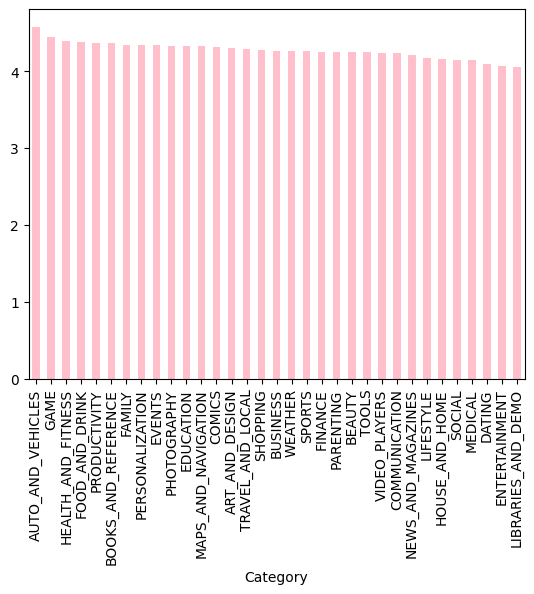

In [268]:
category_ratings_mean.plot(kind='bar',color = 'pink')


Here we can see almost all category apps receives ratings


**8. What are the top categories on Play Store?**


In [269]:
installs2 = merged_df.groupby('Category')['Installs'].max()

<Axes: xlabel='Category'>

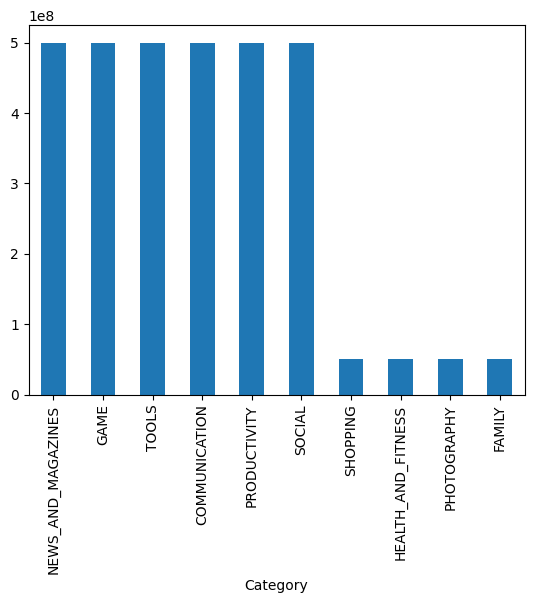

In [270]:
installs.astype(int)
installs.sort_values(ascending=False).head(10).plot(kind='bar')

By this Plot we can see that The top apps on play store are belongs to **NEWS_AND_MAGAZINES, GAME, TOOLS, COMMUNICATION, PRODUCTIVITY , SOCIAL, SHOPPING , HEALTH_AND_FITNESS, PHOTOGRAPHY , FAMILY** these all categories.


**9.Are majority of the apps Paid or Free?**


In [271]:
free_apps = (merged_df['Type']=='Free').sum()
paid_apps = (merged_df['Type']=='Paid').sum()
f_p = [free_apps,paid_apps]

([<matplotlib.patches.Wedge at 0x1882342e500>,
 [Text(0.8163779362461571, -0.7372428807458677, 'Free'),
  Text(-0.8163779578166757, 0.7372428568599864, 'Paid')],
 [Text(0.6308374961902122, -0.5696876805763523, '98.8%'),
  Text(-0.6308375128583402, 0.5696876621190803, '1.2%')])

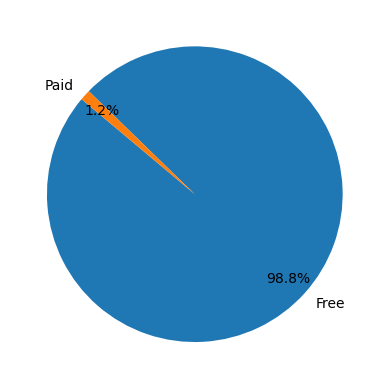

In [272]:

plt.pie(f_p,labels=['Free','Paid'],autopct='%1.1f%%',startangle=140,pctdistance=0.85)


By this Pie plot we can see that majority of the apps on PlayStore Are free. and only 1.2% apps are paid.


**10.Average rating of the apps**


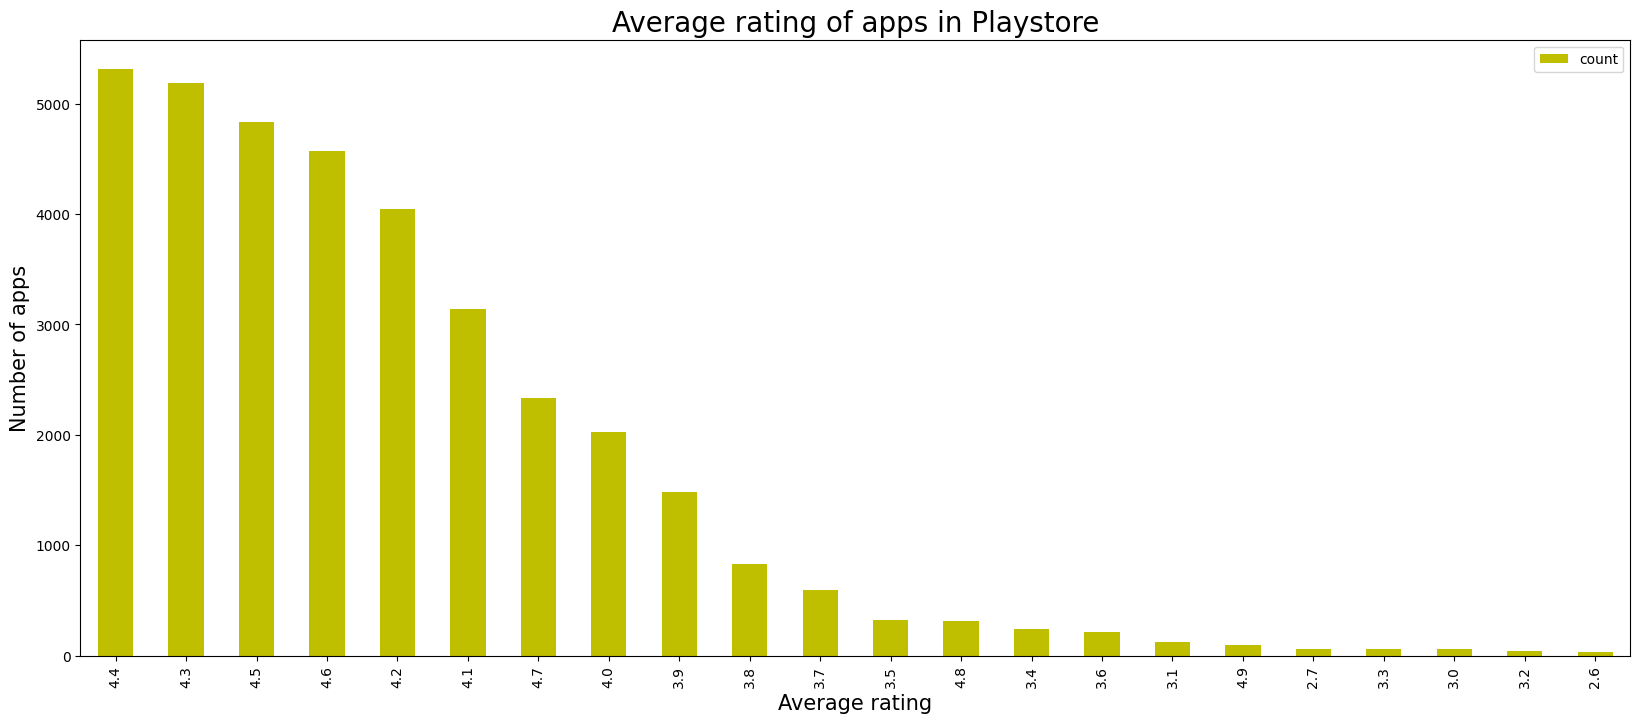

In [273]:
# Average app ratings

merged_df['Rating'].value_counts().plot.bar(figsize=(20,8), color = 'y' )
plt.xlabel('Average rating',fontsize = 15 )
plt.ylabel('Number of apps', fontsize = 15)
plt.title('Average rating of apps in Playstore', fontsize = 20)
plt.legend()

We can represent in some better way like below


In [274]:
# Function to assign values to apps with respective its rating
def Rating_app(val):
  ''''
  This function help to categories the rating from 1 to 5
  as Top_rated,Above_average,Average & below Average
  '''
  if val>=4:
    return 'Top rated'
  elif val>3 and val<4:
    return 'Above Average'
  elif val>2 and val<3:
    return 'Average'
  else:
    return 'Below Average'

In [275]:
# Applying function
merged_df['Rating_group']=merged_df['Rating'].apply(lambda x: Rating_app(x))

In [276]:
merged_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Rating_group
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000,Above Average
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333,Above Average
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000,Above Average
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000,Above Average
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000,Above Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35924,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device,Overall great app. Best gallery seen far,Positive,0.475000,0.512500,Top rated
35925,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device,"Recommended, 100% love it, keep good work dev ...",Positive,0.566667,0.733333,Top rated
35926,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device,Too much ads,Positive,0.200000,0.200000,Top rated
35927,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device,Just allow time ...,Neutral,0.000000,0.000000,Top rated


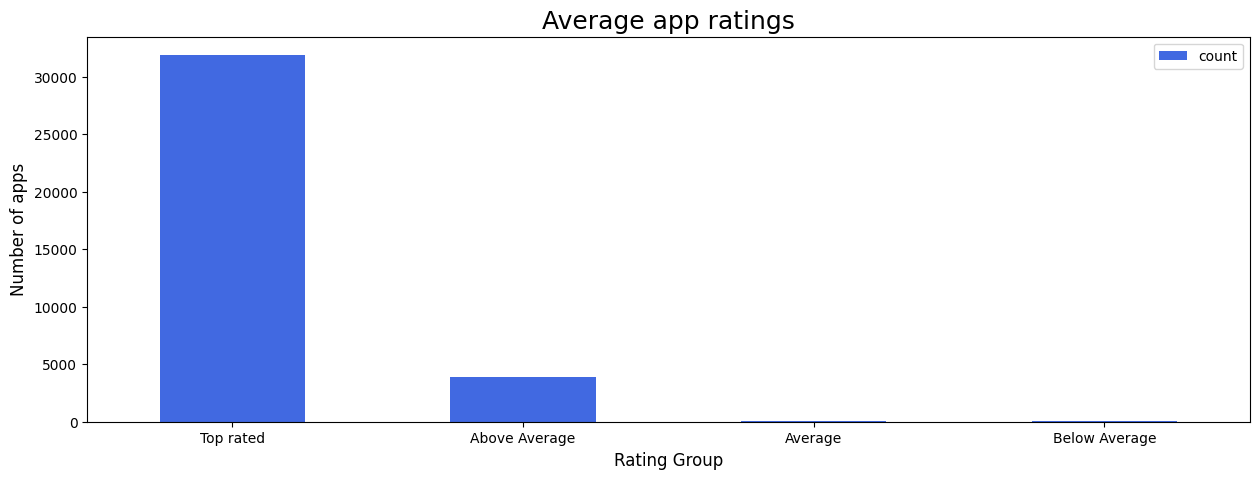

In [277]:
# Average app ratings 
merged_df['Rating_group'].value_counts().plot.bar(figsize=(15,5), color = 'royalblue')
plt.xlabel('Rating Group', fontsize = 12)
plt.ylabel('Number of apps', fontsize = 12)
plt.title('Average app ratings', fontsize = 18)
plt.xticks(rotation=0)
plt.legend()

Here we can see that clearly the most of the apps are with rating between 4 to 5


**11.Top apps that are of free type.**


In [318]:
 # Creating a df for only free apps
free_df = df1[df1['Type'] == 'Free']

In [319]:
# Creating a df for top free apps
top_free_df = free_df[free_df['Installs'] == free_df['Installs'].max()]
top10free_apps=top_free_df.nlargest(10, 'Installs', keep='first')
top10free_apps.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1000000000,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device
341,Hangouts,COMMUNICATION,4.0,3419249,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
865,Google Play Games,ENTERTAINMENT,4.3,7165362,Varies with device,1000000000,Free,0.0,Teen,Entertainment,2018-07-16,Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device


In [320]:
# Top free apps

top_free_df['App']

152                            Google Play Books
335     Messenger – Text and Video Chat for Free
336                           WhatsApp Messenger
338                 Google Chrome: Fast & Secure
340                                        Gmail
341                                     Hangouts
391                Skype - free IM & video calls
865                            Google Play Games
1654                              Subway Surfers
2544                                    Facebook
2545                                   Instagram
2554                                     Google+
2808                               Google Photos
3117                   Maps - Navigate & Explore
3127                          Google Street View
3234                                      Google
3454                                Google Drive
3665                                     YouTube
3687                     Google Play Movies & TV
3736                                 Google News
Name: App, dtype: ob

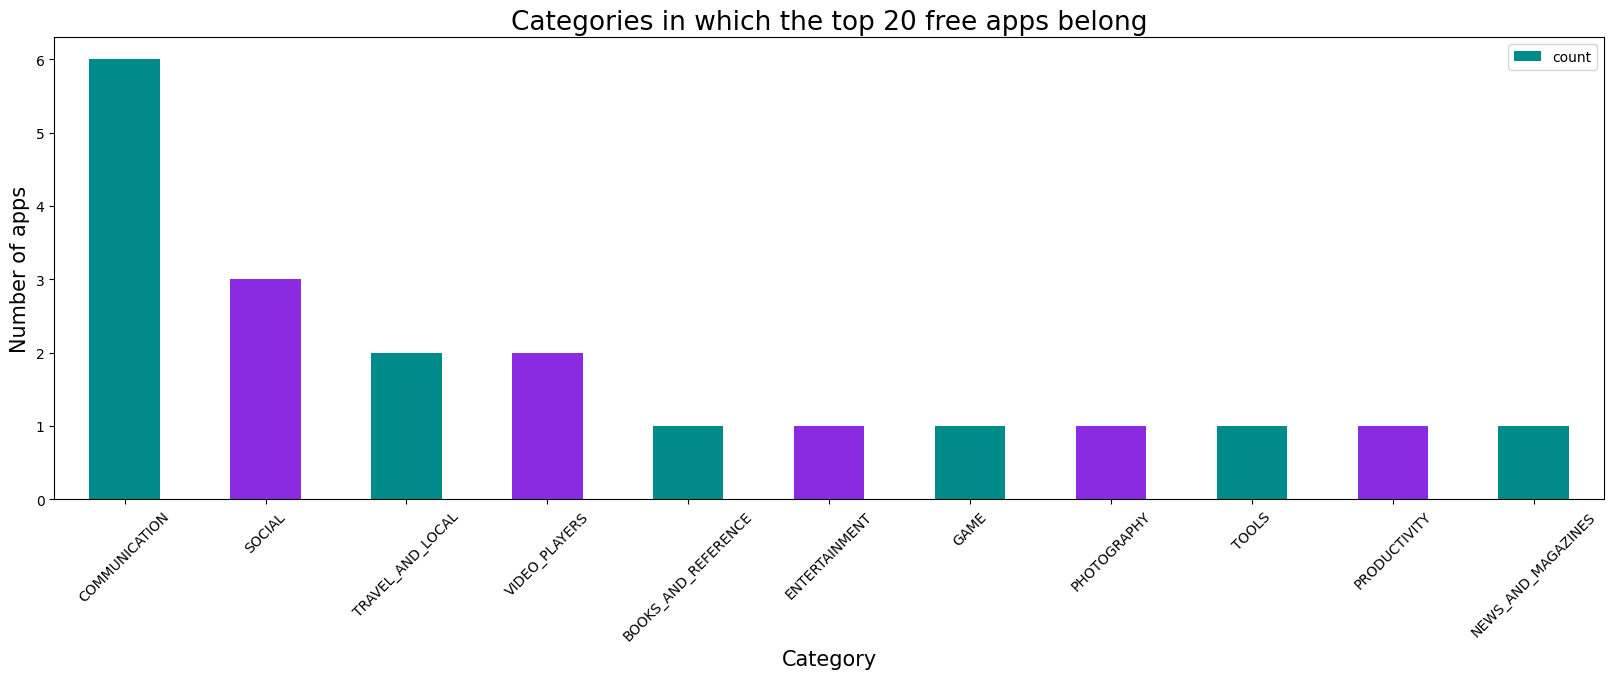

In [323]:
# Categories in which the top 20 free apps belong to
top_free_df['Category'].value_counts().plot.bar(figsize=(20,6), color= ('darkcyan','blueviolet'))
plt.xlabel('Category', size=15)
plt.ylabel('Number of apps', size=15)
plt.title('Categories in which the top 20 free apps belong', size=19)
plt.xticks(rotation=45)
plt.legend()

**12. Top apps that are of paid type.**


In [324]:
 # Creating a df for only free apps
paid_df = df1[df1['Type'] == 'Paid']

In [327]:
# Number of apps that can be installed at a particular price 
paid_df.groupby('Price')['App'].count().sort_values(ascending= False)

Price
0.99      145
2.99      124
1.99       73
4.99       70
3.99       57
         ... 
1.75        1
1.61        1
1.59        1
9.00        1
400.00      1
Name: App, Length: 91, dtype: int64

- In order to select the top paid apps, it won't be fair to look just into the numer of installs. This is because the apps that charge a lower installation fee will be installed by more number of people in general.
- Here a better way to determine the top apps in the paid category is by finding the revenue it generated through app installs.
- This is given by:

Revenue generated through installs = (Number of installs)x(Price to install the app)


In [328]:
paid_df['Revenue'] = paid_df['Installs']*paid_df['Price']
paid_df.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_15240\1179463600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_df['Revenue'] = paid_df['Installs']*paid_df['Price']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,499000.0
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,499000.0
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up,399000.0
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,10000,Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up,39900.0
477,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up,6990.0


In [329]:
# Top app in the paid category

paid_df[paid_df['Revenue'] == paid_df['Revenue'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
2241,Minecraft,FAMILY,4.5,2376564,Varies with device,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,69900000.0


In [330]:
# Top 10 paid apps in the play store
top10paid_apps=paid_df.nlargest(10, 'Revenue', keep='first')
top10paid_apps['App']

2241                        Minecraft
5351                        I am rich
5356                I Am Rich Premium
4034                    Hitman Sniper
7417    Grand Theft Auto: San Andreas
2883              Facetune - For Free
5578          Sleep as Android Unlock
8804              DraStic DS Emulator
4367         I'm Rich - Trump Edition
4362                       💎 I'm rich
Name: App, dtype: object

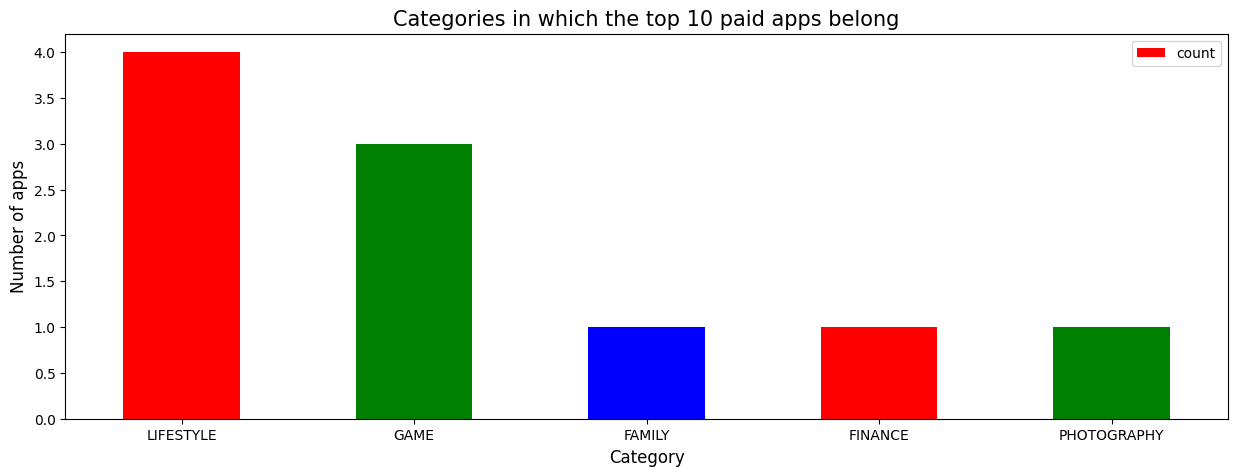

In [332]:
top10paid_apps['Category'].value_counts().plot.bar(figsize=(15,5), color= [ "red", "green", "blue"])
plt.xlabel('Category',size=12)
plt.ylabel('Number of apps',size=12)
plt.title('Categories in which the top 10 paid apps belong', size=15)
plt.xticks(rotation=0)
plt.legend()

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  func(*args, **kwargs)
C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


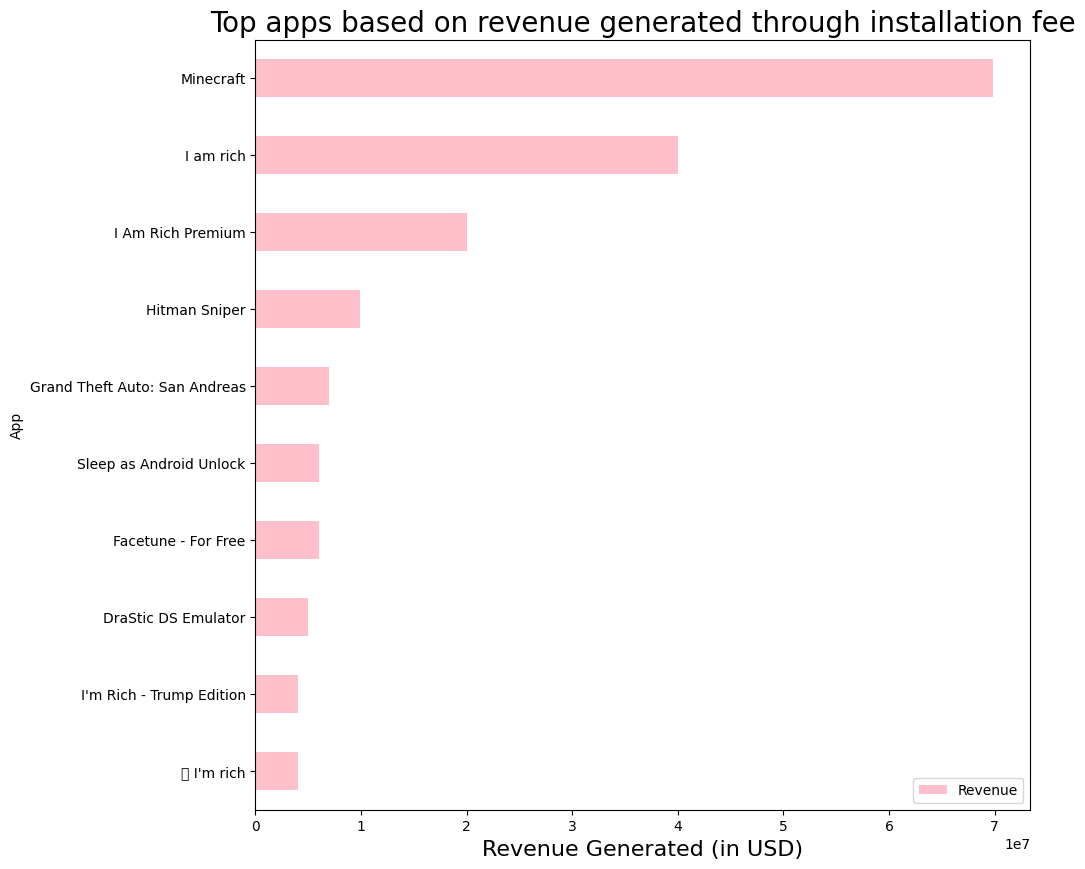

In [336]:
top10paid_apps.groupby('App')['Revenue'].mean().sort_values(ascending= True).plot.barh(figsize=(10,10), color='pink')
plt.xlabel('Revenue Generated (in USD)', size=16)
plt.title('Top apps based on revenue generated through installation fee', size=20)
plt.legend()

**13. Android version based on each category ?**


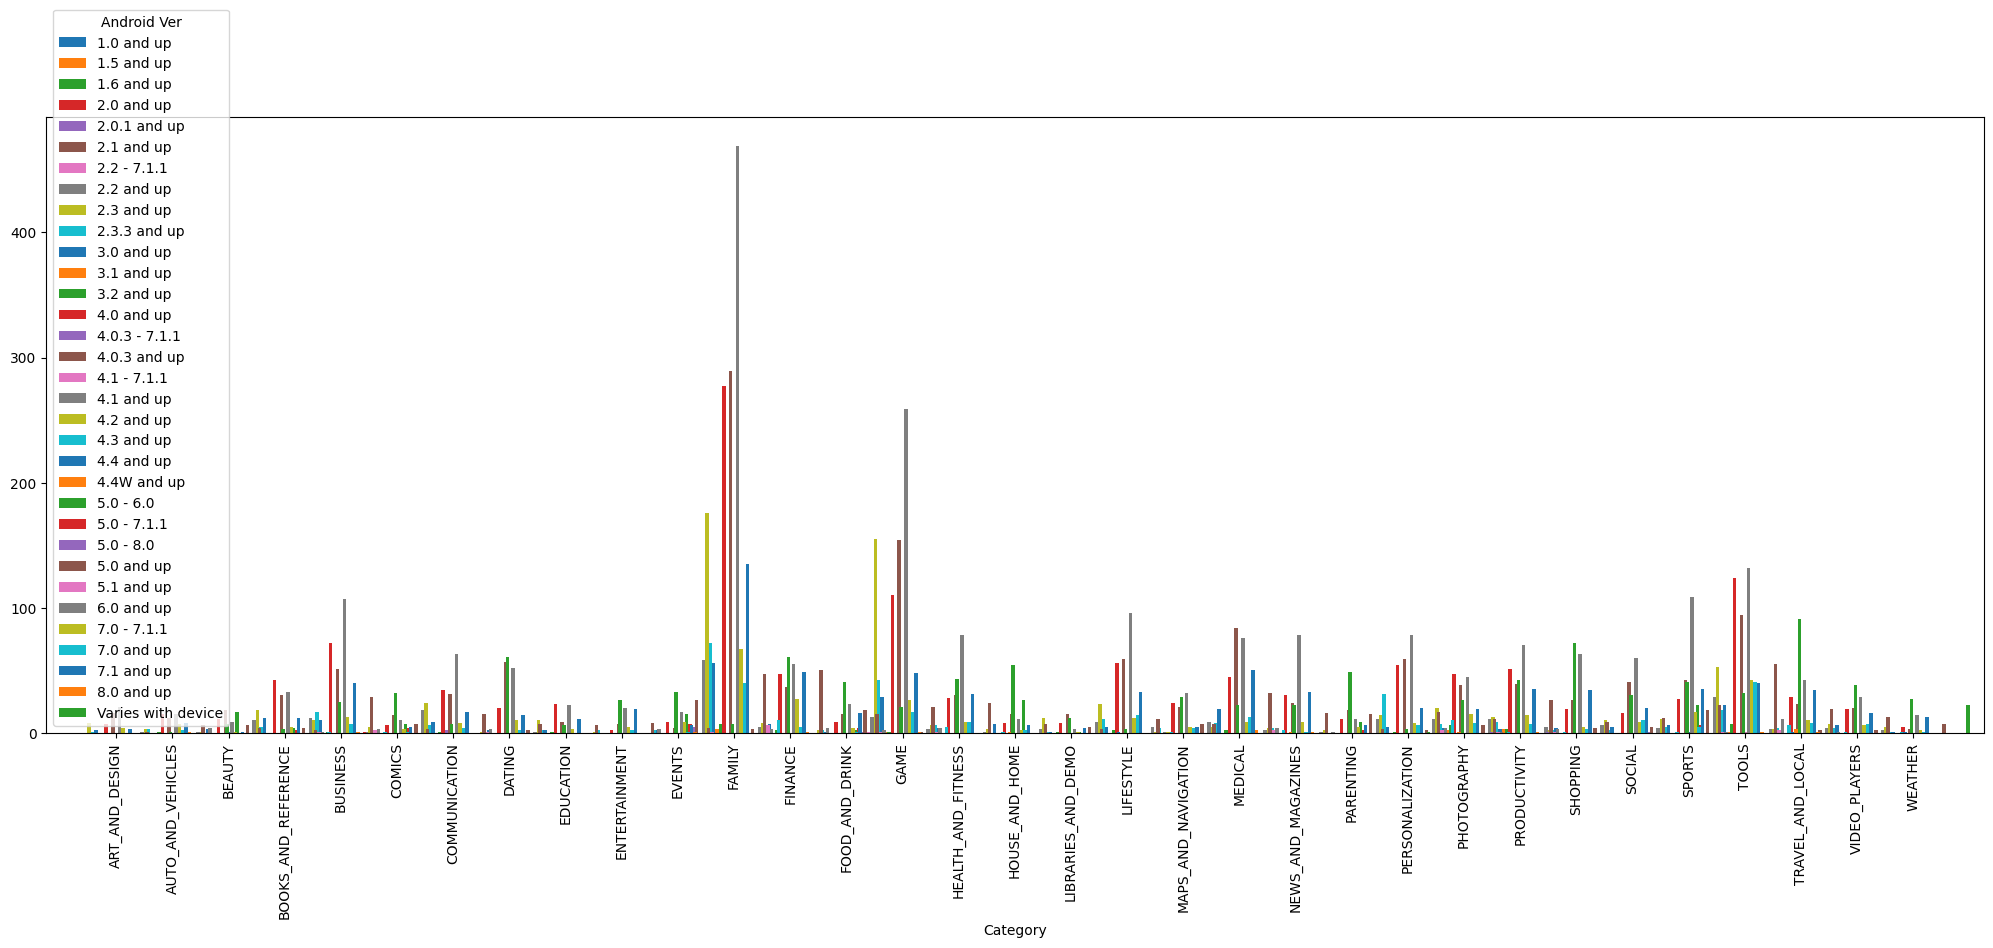

In [337]:
Type_cat = df1.groupby('Category')['Android Ver'].value_counts().unstack().plot.bar(figsize=(25,8), width=2)
plt.xticks()
plt.show()

Now we will group the versions 1 to 8 of android and we will change the null values to 1.


In [338]:
df1['Android Ver'].replace(to_replace=['4.4W and up','Varies with device'], value=['4.4','1.0'],inplace=True)
df1['Android Ver'].replace({k: '1.0' for k in ['1.0','1.0 and up','1.5 and up','1.6 and up']},inplace=True)
df1['Android Ver'].replace({k: '2.0' for k in ['2.0 and up','2.0.1 and up','2.1 and up','2.2 and up','2.2 - 7.1.1','2.3 and up','2.3.3 and up']},inplace=True)
df1['Android Ver'].replace({k: '3.0' for k in ['3.0 and up','3.1 and up','3.2 and up']},inplace=True)
df1['Android Ver'].replace({k: '4.0' for k in ['4.0 and up','4.0.3 and up','4.0.3 - 7.1.1','4.1 and up','4.1 - 7.1.1','4.2 and up','4.3 and up','4.4','4.4 and up']},inplace=True)
df1['Android Ver'].replace({k: '5.0' for k in ['5.0 - 6.0','5.0 - 7.1.1','5.0 - 8.0','5.0 and up','5.1 and up']},inplace=True)
df1['Android Ver'].replace({k: '6.0' for k in ['6.0 and up']},inplace=True)
df1['Android Ver'].replace({k: '7.0' for k in ['7.0 - 7.1.1','7.0 and up','7.1 and up']},inplace=True)
df1['Android Ver'].replace({k: '8.0' for k in ['8.0 and up']},inplace=True)
df1['Android Ver'].fillna('1.0', inplace=True)

Category        Android Ver
ART_AND_DESIGN  4.0            51
                2.0             9
                3.0             2
                5.0             1
                1.0             1
                               ..
WEATHER         4.0            38
                1.0            23
                2.0            10
                5.0             7
                3.0             1
Name: count, Length: 199, dtype: int64


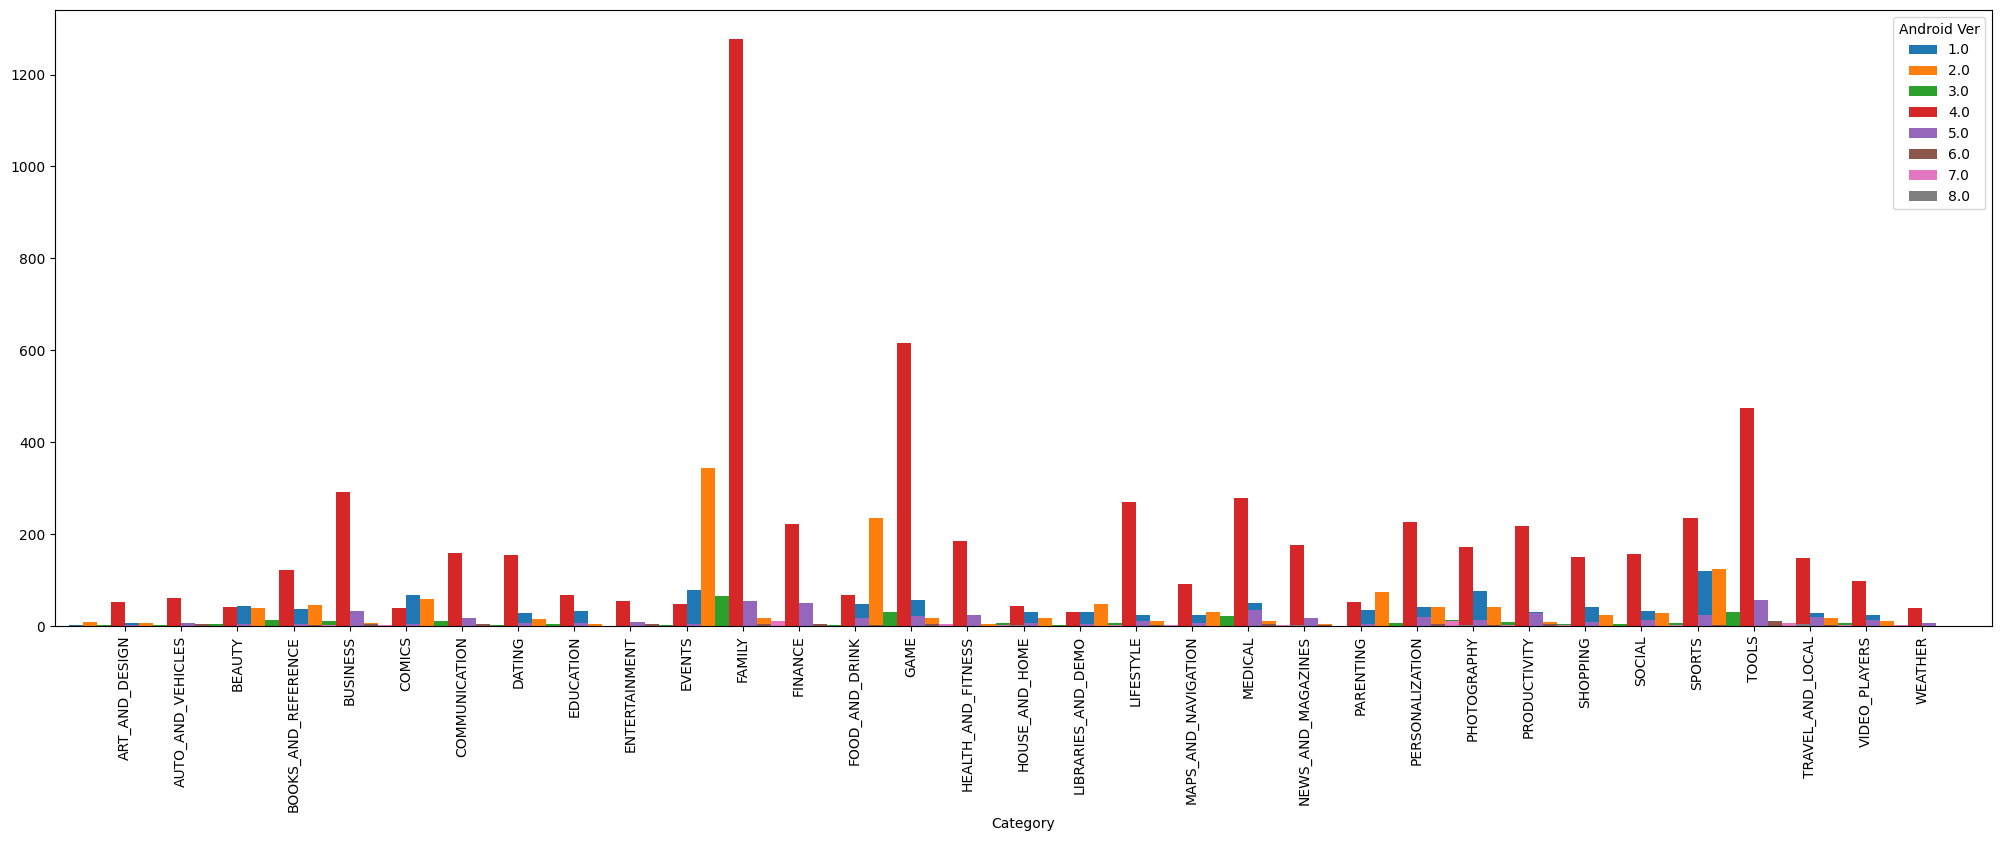

In [339]:
print(df1.groupby('Category')['Android Ver'].value_counts())
Type_cat = df1.groupby('Category')['Android Ver'].value_counts().unstack().plot.bar(figsize=(25,8), width=2)
plt.xticks()
plt.show()

Here We can see that Major apps are run on Android 4 and upper versions.


## **Now Let's Do Some Visulazation On User Review Data Set Also**


**14.Percentage of Seniment**


In [340]:
df2.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [344]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [352]:
perc = df2['Sentiment'].value_counts()

In [353]:
perc

Sentiment
Positive    23998
Negative     8271
Neutral      5158
Name: count, dtype: int64

In [354]:
perc2 = (perc / perc.sum())*100

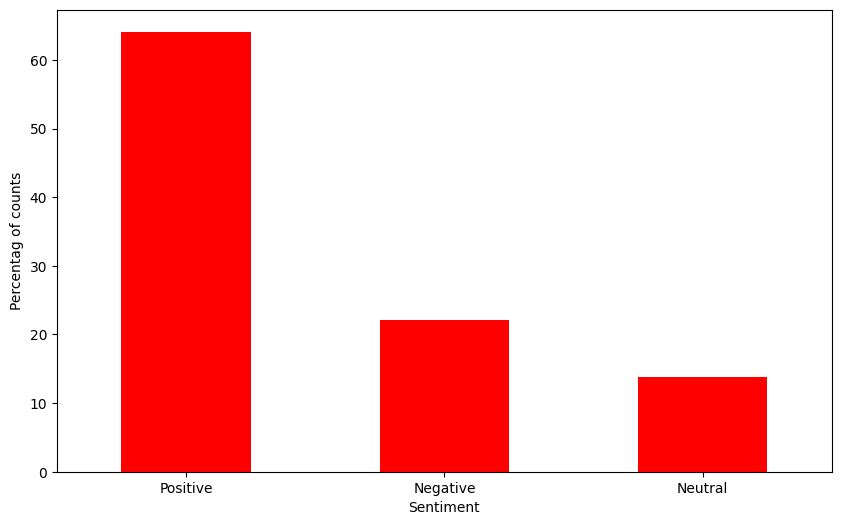

In [357]:
plt.figure(figsize=(10,6))
perc2.plot(kind='bar',rot=0,color='r')
plt.xlabel("Sentiment")
plt.ylabel("Percentag of counts")
plt.show()

1. Positive reviews are **64.30%**
2. Negative reviews are **22.80%**
3. Neutral reviews are **12.90%**


**15.Apps with the highest number of positive reviews**


In [358]:
positive_ur_df=df2[df2['Sentiment']=='Positive']
positive_ur_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


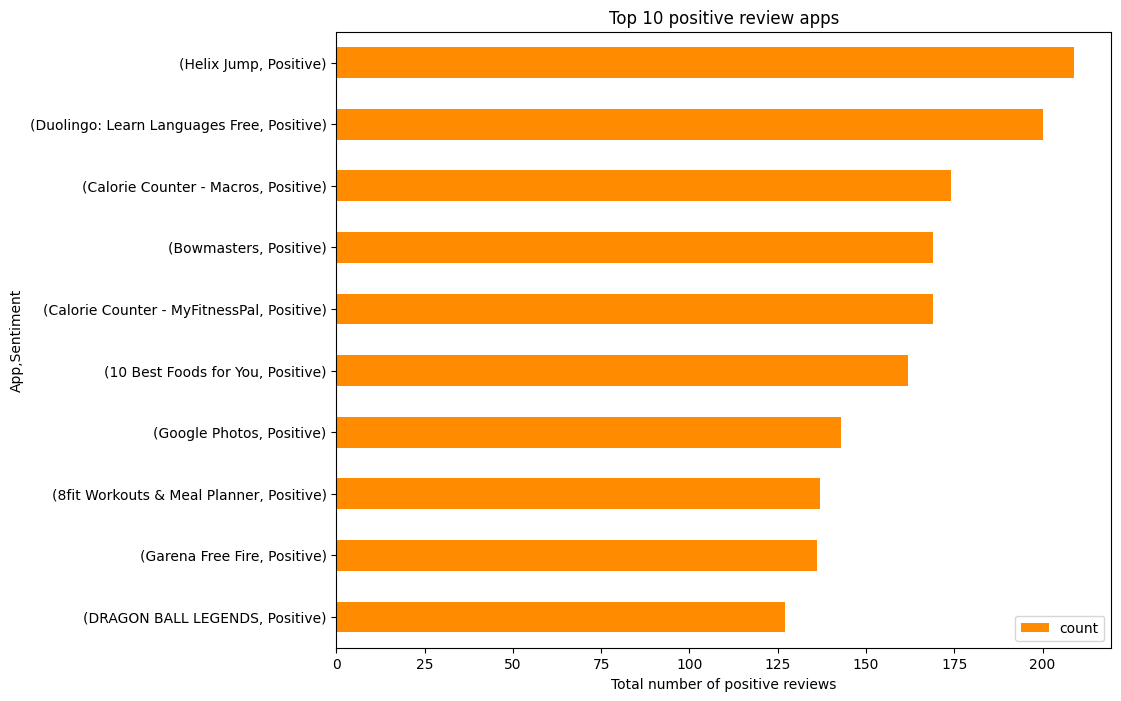

In [360]:
positive_ur_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(10,8),color='darkorange').invert_yaxis()
plt.title("Top 10 positive review apps")
plt.xlabel('Total number of positive reviews')
plt.legend()

**16. Apps with the highest number of negative reviews.**


In [361]:
negative_ur_df=df2[df2['Sentiment']=='Negative']
negative_ur_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


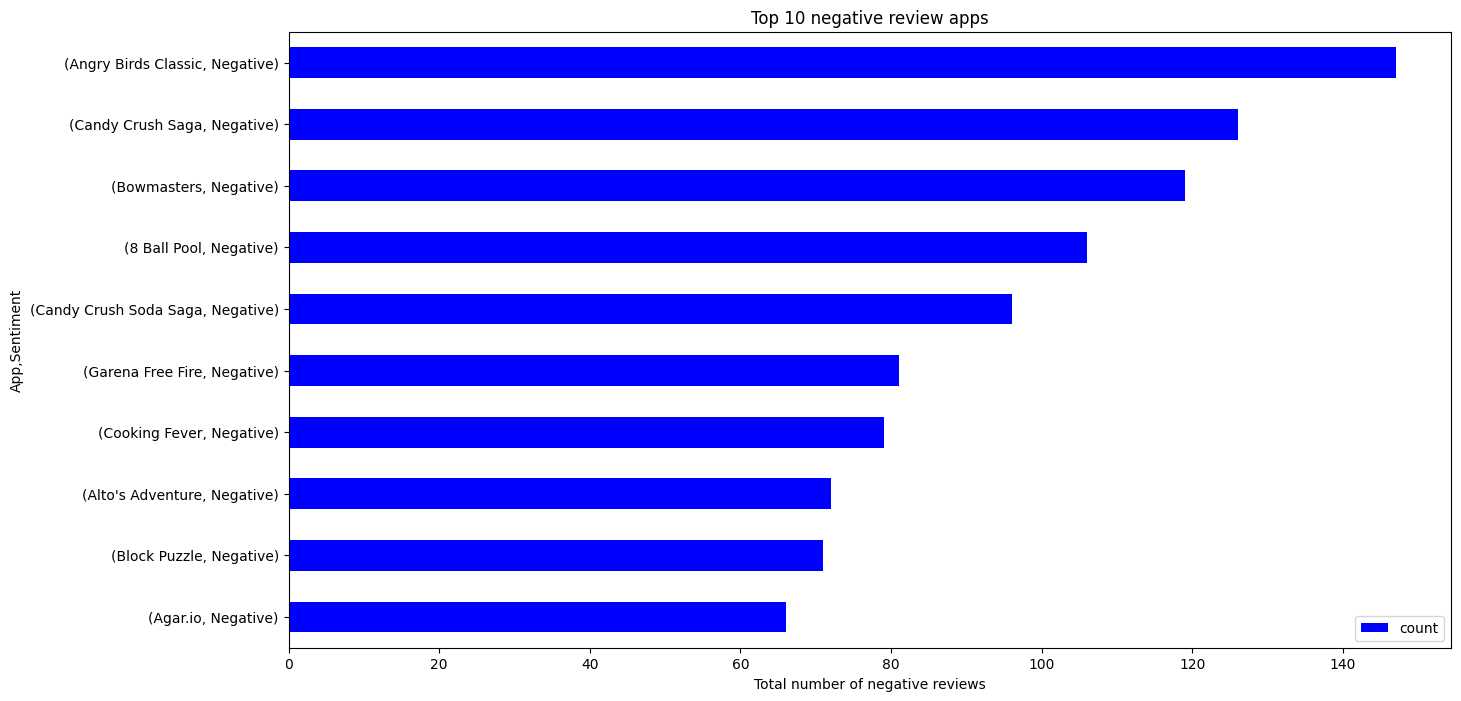

In [362]:
negative_ur_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(15,8),color='blue').invert_yaxis()
plt.title("Top 10 negative review apps")
plt.xlabel('Total number of negative reviews')
plt.legend()

**17. Histogram of Subjectivity**


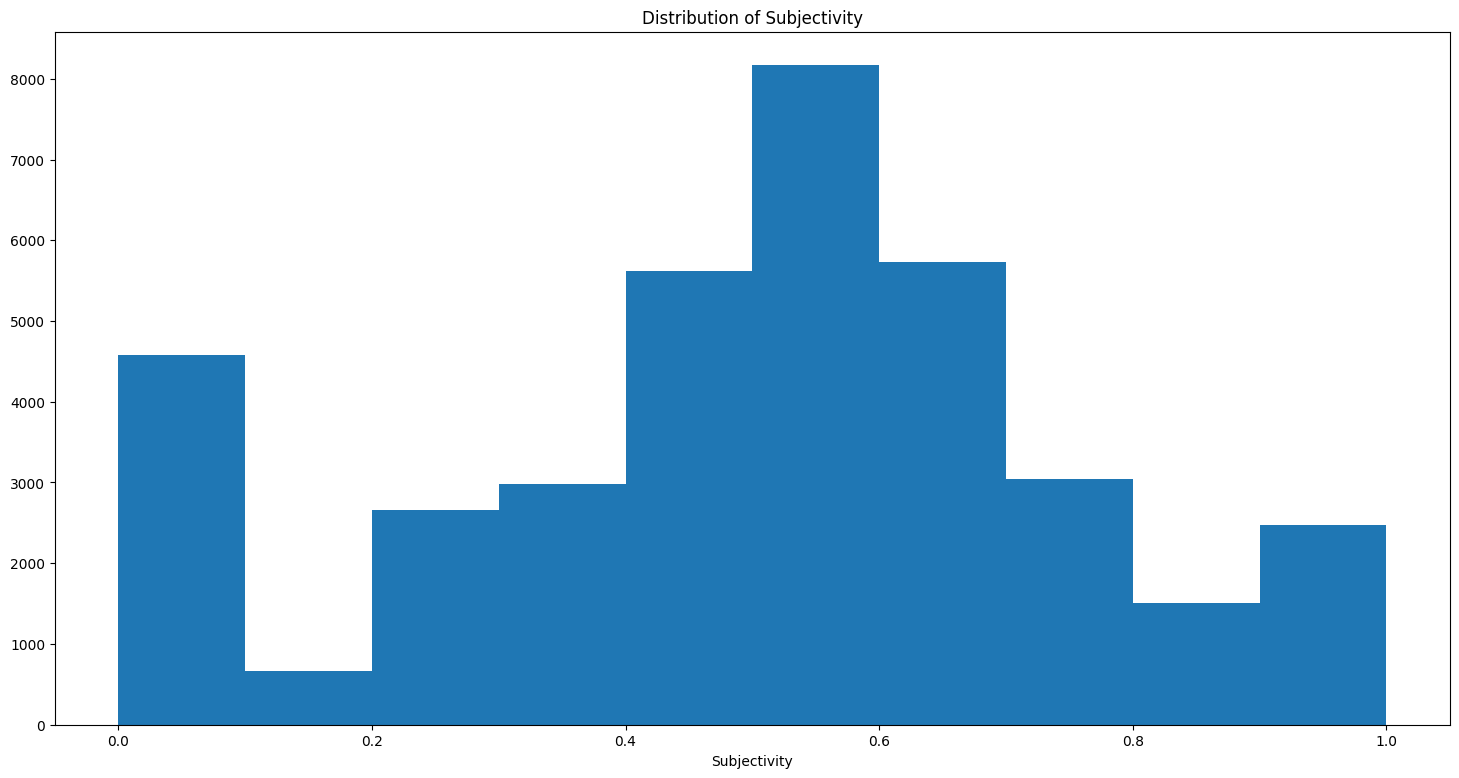

In [363]:
plt.figure(figsize=(18,9))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(df2[df2['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

We can be seen that maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that maximum number of users give reviews to the applications, according to their experience.


# **Let's See How Content Rating affect over the App**


**18.Paid App Content Rating**


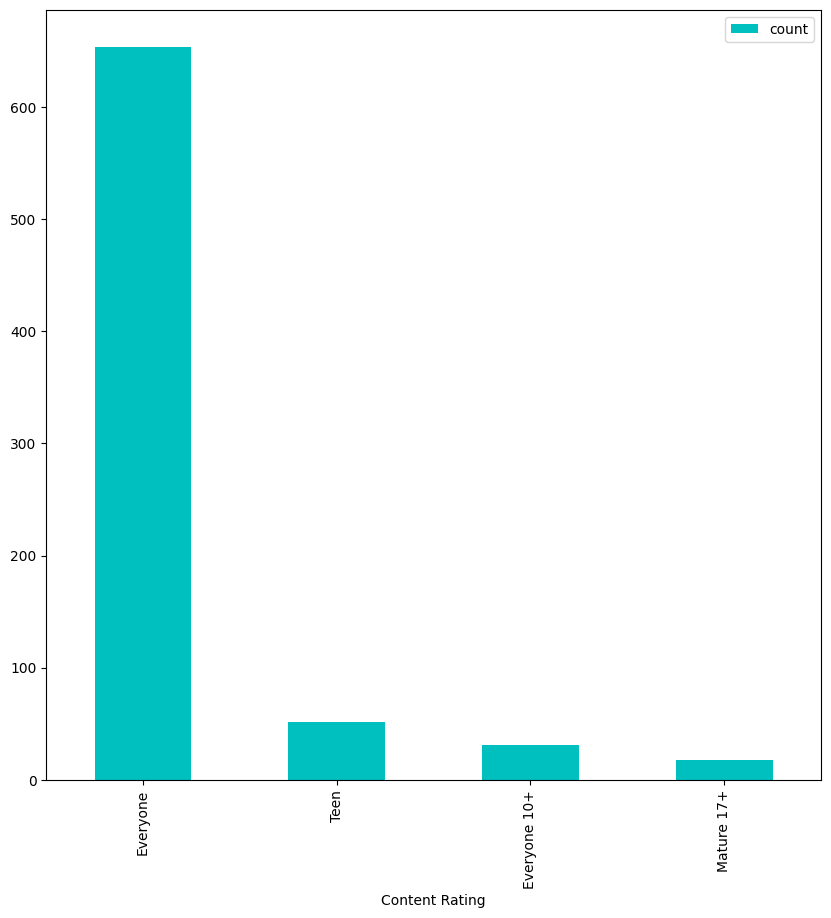

In [368]:
paid_df['Content Rating'].value_counts().plot.bar(figsize=(10,10),color='c')
plt.legend()

**19.Free App content Rating**


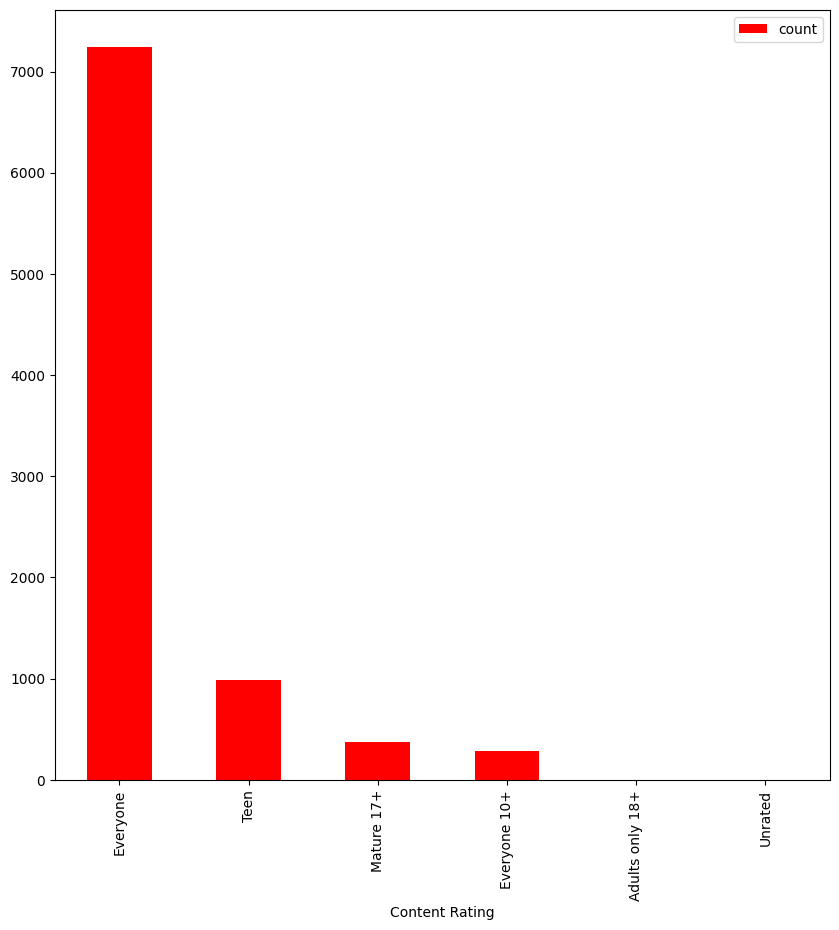

In [371]:
free_df['Content Rating'].value_counts().plot.bar(figsize=(10,10),color='red')
plt.legend()

**19.Does Last Update date has an effects on rating?**


In [372]:
print(df1['Last Updated'].head())
#fetch update year from date
df1["Update year"] = df1["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64') 

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]


Text(0.5, 1.0, 'Update Year VS Rating')

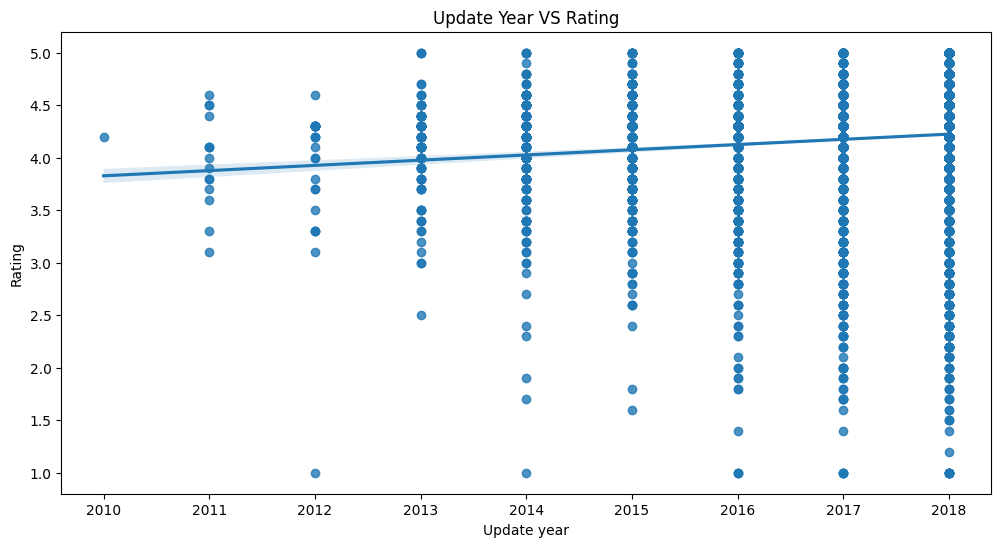

In [374]:
fig, ax = plt.subplots(figsize=(12,6))
sns.regplot(x="Update year", y="Rating", data=df1)
plt.title("Update Year VS Rating")

**20. Distribution of App update over the Year**


In [375]:
paid_df["Update year"] = paid_df["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64') 
free_df["Update year"] = free_df["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64') 

C:\Users\Dell\AppData\Local\Temp\ipykernel_15240\1492177263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_df["Update year"] = paid_df["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64')
C:\Users\Dell\AppData\Local\Temp\ipykernel_15240\1492177263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  free_df["Update year"] = free_df["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64')


<Axes: xlabel='Update year'>

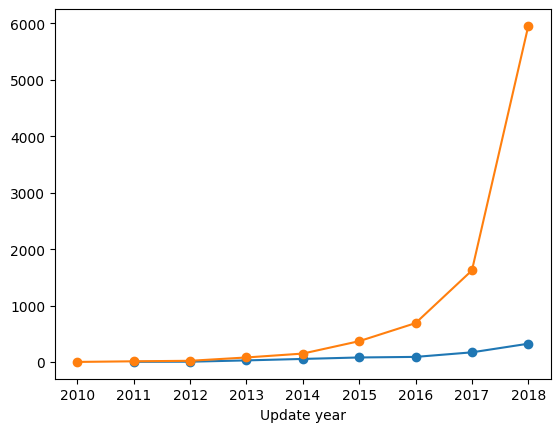

In [376]:
paid_df.groupby("Update year")["App"].count().plot.line(marker='o')
free_df.groupby('Update year')['App'].count().plot.line(marker='o')

In the above plot, we plotted the apps updated or added over the years comparing Free vs. Paid, by observing this plot we can conclude that before 2011 there were no paid apps, but with the years passing free apps has been added more in comparison to paid apps, By comparing the apps updated or added in the year 2011 and 2018 free apps are increases from 80% to 96% and paid apps are goes from 20% to 4%. So we can conclude that most of the people are after free apps


**21. Distribution of Paid and Free app updated over the Month**


In [377]:
paid_df["Update month"] = paid_df["Last Updated"].apply(lambda x: x.strftime('%m')).astype('int64') 
free_df["Update month"] = free_df["Last Updated"].apply(lambda x: x.strftime('%m')).astype('int64') 

C:\Users\Dell\AppData\Local\Temp\ipykernel_15240\2583894264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_df["Update month"] = paid_df["Last Updated"].apply(lambda x: x.strftime('%m')).astype('int64')
C:\Users\Dell\AppData\Local\Temp\ipykernel_15240\2583894264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  free_df["Update month"] = free_df["Last Updated"].apply(lambda x: x.strftime('%m')).astype('int64')


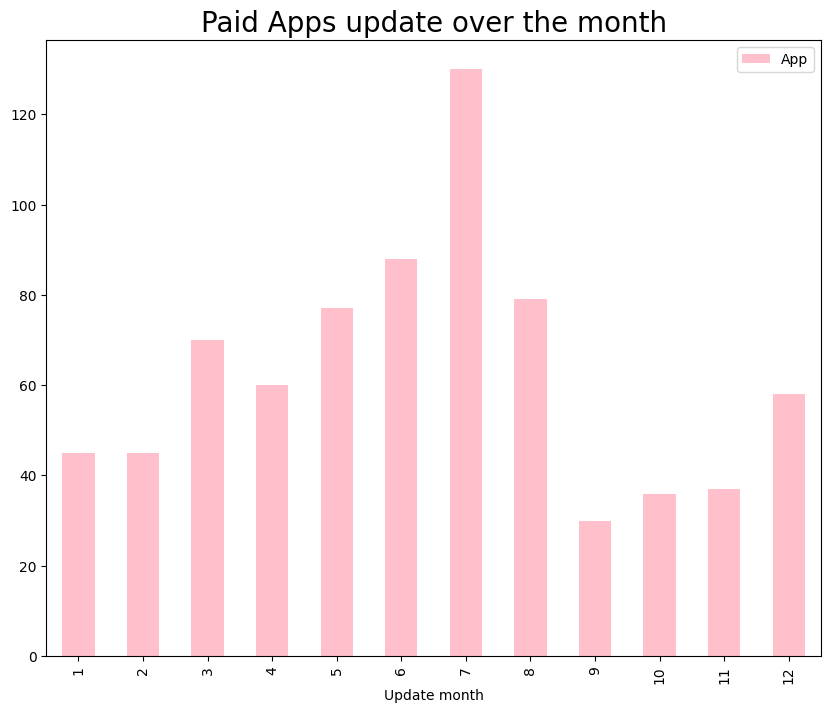

In [378]:
paid_df.groupby("Update month")["App"].count().plot.bar(figsize=(10,8), color= "pink")
plt.title("Paid Apps update over the month", size=20)
plt.legend()

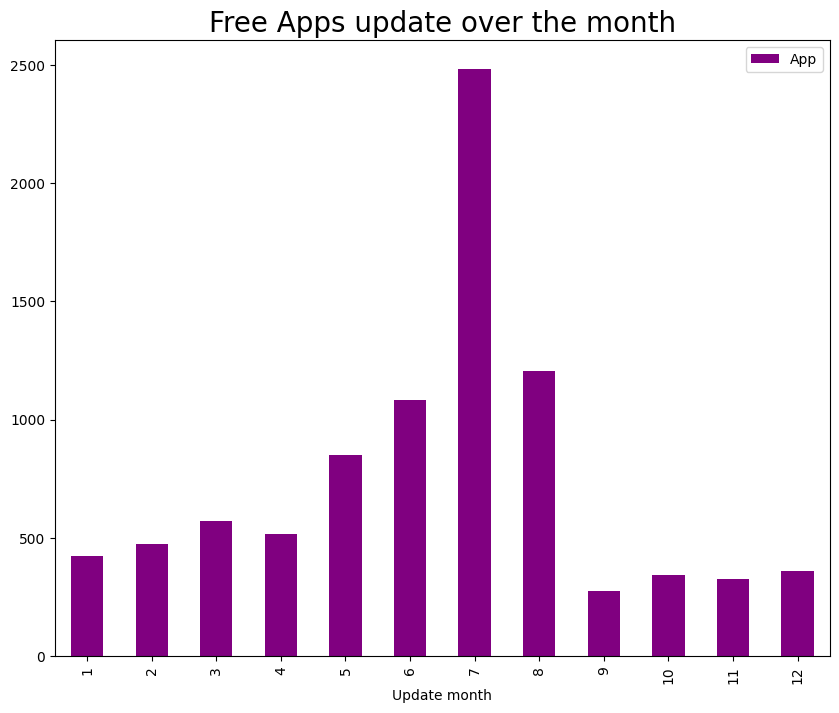

In [379]:
free_df.groupby("Update month")["App"].count().plot.bar(figsize=(10,8), color='purple')
plt.title("Free Apps update over the month", size=20)
plt.legend()

Most of the free apps updated in july.
